In [1]:
#remove cell visibility
from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Promijeni vidljivost <a href="javascript:code_toggle()">ovdje</a>.''')
display(tag)

## Upravljanje bočnog položaja lunarnog prizemljivača

Ovaj primjer ilustrira razvoj regulatora (promatrača i kontrolera u formi povratne veze stanja) za upravljanje bočnim položajem lunarnog prizemljivača, počevši od jednadžbi sustava.

<img src="Images\lunarlander.PNG" alt="drawing" width="500x800">

Sustav je predstavljen na gornjoj slici, njegov vertikalni spust usporen je pomoću vertikalnog potisnika koji proizvodi konstantnu silu $F$. Horizontalno kretanje može se postići laganim naginjanjem prizemljivača za kut $\theta$; naginjanjem se stvara bočna sila koja je približno jednaka $F\theta$. Nagib se postiže generiranjem momenta $T$ pomoću skupa upravljačkih raketa (maksimalni moment = 500 Nm). Kut nagiba mora biti unutar$\pm15$ stupnjeva kako bi se izbjeglo opasno povećanje brzine vertikalnog spusta. Izmjerene veličine su bočni položaj i brzina. Pretpostavlja se da je atmosferski otpor zanemariv, a vrijednosti parametara navedene su u donjoj tablici.

| Parametar |                     Vrijednost |
|-----------|-------------------------------:|
|$m$        |                        1000 kg |
|$J$        |           1000 kg$\text{m}^2$ |
|$F$        |                         1500 N |

Cilj dizajna upravljačkog sustava je postići sljedeće performanse za regulaciju vodoravnog položaja $z$:
1. Maksimalno prekoračenje od 30%.
2. Vrijeme smirivanja (za 5% pojasa tolerancije) manje od 15 sekundi.
3. Kut $\theta$ uvijek unutar svojih granica za željenu maksimalnu bočnu promjenu od 10 metara.
4. Nulta pogreška kao odziv na naredbeni korak.

Jednadžbe sustava su:


\begin{cases}
J\ddot{\theta}=T \\
m\ddot{z}=F\theta
\end{cases}
i definiranjem $\textbf{x}=[x_1,x_2,x_3,x_4]^T=[z,\dot{z},\theta,\dot{\theta}]^T$ kao vektora stanja te $u=T$ kao ulaza, u formi prostora stanja dobivamo:

\begin{cases}
\dot{\textbf{x}}=\underbrace{\begin{bmatrix}0&1&0&0 \\ 0&0&F/m&0 \\ 0&0&0&1 \\ 0&0&0&0\end{bmatrix}}_{A}\textbf{x}+\underbrace{\begin{bmatrix}0\\0\\0\\1/J\end{bmatrix}}_{B}u \\ \\
\textbf{y}=\underbrace{\begin{bmatrix}1&0&0&0 \\ 0&1&0&0\end{bmatrix}}_{C}\textbf{x}.
\end{cases}

### Dizajn kontrolera
Kako bi postigli nultu pogrešku za odziv na referentni korak, sustav se proširuje dodavanjem novog stanja $\dot{x_5}=y_1-y_d$ gdje je $y_1$ izmjereni bočni položaj, a $y_d$ je vrijednost željenog položaja. Stoga je prošireni sustav:

\begin{cases}
\dot{\textbf{x}_a}=\underbrace{\begin{bmatrix}0&1&0&0&0 \\ 0&0&F/m&0&0 \\ 0&0&0&1&0 \\ 0&0&0&0&0 \\ 1&0&0&0&0 \end{bmatrix}}_{A_a}\textbf{x}_a+\underbrace{\begin{bmatrix} 0&0\\0&0\\0&0\\1/J&0\\0&-1 \end{bmatrix}}_{B_a}\underbrace{\begin{bmatrix} u\\y_d \end{bmatrix}}_{u_a} \\ \\
\textbf{y}_a=\underbrace{\begin{bmatrix}1&0&0&0&0\\0&1&0&0&0\\0&0&0&0&1\end{bmatrix}}_{C_a}\textbf{x}_a
\end{cases}

koji se može kontrolirati (upravljiv) s prvim stupcem od $B_a$, tako da je moguće koristiti metodu postavljanja polova. Imajte na umu da je, kako bi se održala osmotrivost sustava, dodan red u matrici $C$ jer je poznato novo stanje $x_5$.

Matrica pojačanja $K_a$ koja zadovoljava sve zadane uvjete je:
$$
K_a=\begin{bmatrix}2225.0&6244.0&13861.0&5275.0&316.0\end{bmatrix}
$$
čime se polovi od $(A_a-B_aK_a)$ pozicioniraju na $-0.28$, $-2.24+2.23i$, $-2.24-2.23i$, $-0.26+0.32i$ i $-0.26-0.32i$.

### Dizajn promatrača
Sustav je osmotriv, a, budući da se mjere tri stanja, moguće je dizajnirati promatrač s reduciranim stanjima (za $\theta$ i $\dot{\theta}$) koji ima strukturu:
$$
\dot{\hat{\textbf{v}}}=(A_{11}+L_aA_{21})\hat{\textbf{v}}+(A_{12}+L_aA_{22}-A_{11}L_a-L_aA_{21}L_a)\textbf{y}_a+(B_1+L_aB_2)u_a,
$$
gdje je
$$
T^{-1}A_aT=\begin{bmatrix}A_{11}&A_{12} \\ A_{21}&A_{22}\end{bmatrix}, 
\quad T^{-1}B_a=\begin{bmatrix}B_1 \\ B_2\end{bmatrix}, 
\quad \overline{\textbf{x}_a}=T^{-1}\textbf{x}_a=\begin{bmatrix}V \\ C\end{bmatrix}\textbf{x}_a, 
\quad V=\begin{bmatrix}0&0&1&0&0 \\ 0&0&0&1&0\end{bmatrix}, 
\quad \hat{\textbf{x}_a}=\begin{bmatrix}\hat{\textbf{v}}-L_a\textbf{y}_a \\ \textbf{y}_a\end{bmatrix}.
$$

Odabir svojstvenih vrijednosti promatrača vrši se na način da dinamika pogrešaka konvergira brže od dinamike sustava specificirane zahtjevima. Svojstvene vrijednosti odabrane za $A_{11}+L_aA_{21}$ su $\lambda_i=-10$ rad/s, $i=1,2$ uz
$$ L_a=\begin{bmatrix}0&-\frac{40}{3}&0 \\ 0&-\frac{200}{3}&0\end{bmatrix} $$



### Kako koristiti ovaj interaktivni primjer?
Učinkovitost sustava možete provjeriti s razvijenim regulatorom i izravno modificirati kontroler i/ili promatrač. Simulacija započinje početnom pogreškom promatrača.

In [2]:
#Preparatory Cell 

%matplotlib notebook
import control as ctrl
import numpy
import sympy as sym
from IPython.display import display, Markdown
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.transforms as transforms
import matplotlib.lines as lines

#print a matrix latex-like
def bmatrix(a):
     """Returns a LaTeX bmatrix - by Damir Arbula (ICCT project)

     :a: numpy array
     :returns: LaTeX bmatrix as a string
     """
     if len(a.shape) > 2:
         raise ValueError('bmatrix can at most display two dimensions')
     lines = str(a).replace('[', '').replace(']', '').splitlines()
     rv = [r'\begin{bmatrix}']
     rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
     rv +=  [r'\end{bmatrix}']
     return '\n'.join(rv)


# Display formatted matrix: 
def vmatrix(a):
    if len(a.shape) > 2:
         raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{vmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{vmatrix}']
    return '\n'.join(rv)


#matrixWidget is a matrix looking widget built with a VBox of HBox(es) that returns a numPy array as value !
class matrixWidget(widgets.VBox):
    def updateM(self,change):
        for irow in range(0,self.n):
            for icol in range(0,self.m):
                self.M_[irow,icol] = self.children[irow].children[icol].value
                #print(self.M_[irow,icol])
        self.value = self.M_

    def dummychangecallback(self,change):
        pass
    
    
    def __init__(self,n,m):
        self.n = n
        self.m = m
        self.M_ = numpy.matrix(numpy.zeros((self.n,self.m)))
        self.value = self.M_
        widgets.VBox.__init__(self,
                             children = [
                                 widgets.HBox(children = 
                                              [widgets.FloatText(value=0.0, layout=widgets.Layout(width='90px')) for i in range(m)]
                                             ) 
                                 for j in range(n)
                             ])
        
        #fill in widgets and tell interact to call updateM each time a children changes value
        for irow in range(0,self.n):
            for icol in range(0,self.m):
                self.children[irow].children[icol].value = self.M_[irow,icol]
                self.children[irow].children[icol].observe(self.updateM, names='value')
        #value = Unicode('example@example.com', help="The email value.").tag(sync=True)
        self.observe(self.updateM, names='value', type= 'All')
        
    def setM(self, newM):
        #disable callbacks, change values, and reenable
        self.unobserve(self.updateM, names='value', type= 'All')
        for irow in range(0,self.n):
            for icol in range(0,self.m):
                self.children[irow].children[icol].unobserve(self.updateM, names='value')
        self.M_ = newM
        self.value = self.M_
        for irow in range(0,self.n):
            for icol in range(0,self.m):
                self.children[irow].children[icol].value = self.M_[irow,icol]
        for irow in range(0,self.n):
            for icol in range(0,self.m):
                self.children[irow].children[icol].observe(self.updateM, names='value')
        self.observe(self.updateM, names='value', type= 'All')        

                #self.children[irow].children[icol].observe(self.updateM, names='value')

             
#overlaod class for state space systems that DO NOT remove "useless" states (what "professor" of automatic control would do this?)
class sss(ctrl.StateSpace):
    def __init__(self,*args):
        #call base class init constructor
        ctrl.StateSpace.__init__(self,*args)
    #disable function below in base class
    def _remove_useless_states(self):
        pass

In [3]:
# Define matrixes

A = numpy.matrix('0 1 0 0; 0 0 1.5 0; 0 0 0 1; 0 0 0 0')
B = numpy.matrix('0;0;0;0.001')
C = numpy.matrix('1 0 0 0; 0 1 0 0')
Aa = numpy.matrix('0 1 0 0 0; 0 0 1.5 0 0; 0 0 0 1 0; 0 0 0 0 0; 1 0 0 0 0')
Ba = numpy.matrix('0 0;0 0;0 0;0.001 0;0 -1')
Ca = numpy.matrix('1 0 0 0 0; 0 1 0 0 0; 0 0 0 0 1')
Ka1 = numpy.matrix('[2225.0, 6244.0, 13861.0, 5275.0, 316.0') #318.9333 835 2012.5 2000 59.6
Ta = (numpy.matrix('0 0 1 0 0; 0 0 0 1 0; 1 0 0 0 0;0 1 0 0 0; 0 0 0 0 1'))**(-1)
Ar = Ta**(-1)*Aa*Ta
Br = Ta**(-1)*Ba
A11 = Ar[0:2,0:2]
A12 = Ar[0:2,2:5]
A21 = Ar[2:5,0:2]
A22 = Ar[2:5,2:5]
B1 = Br[0:2,:]
B2 = Br[2:5,:]
La1 = numpy.matrix([[0, -4*10/3, 0],[0, -3/8*(-4*10/3)**2, 0]])
X0a = numpy.matrix('0;0;0;0;0;0;0;0;0;0;0.002;0.002;0;0;0;0;0;0.002;0.002;0;0;0;0;0')
# X0a = numpy.matrix('0;0;0;0;0')
# V0 = numpy.matrix('0;0')

In [4]:
# Define matrixes widget
Kaw = matrixWidget(1,5)
Law = matrixWidget(2,3)
eig1 = matrixWidget(1,1)
eig2 = matrixWidget(2,1)
eig3 = matrixWidget(2,1)
eig4 = matrixWidget(1,1)
eig5 = matrixWidget(1,1)
eig1o = matrixWidget(1,1)
eig2o = matrixWidget(2,1)

Ydw = widgets.FloatSlider(
                         value=10,
                         min=0,
                         max=10.0,
                         step=0.1,
                         description='$y_d$:',
                         disabled=False,
                         continuous_update=False,
                         orientation='horizontal',
                         readout=True,
                         readout_format='.1f',
                        )

# Init matrix widgets
Kaw.setM(Ka1) 
Law.setM(La1)
#[-0.6,-0.5-0.35j,-0.5+0.35j,-0.2-0.6j,-0.2+0.6j]
eig1.setM(numpy.matrix([-0.28]))
eig2.setM(numpy.matrix([[-2.24],[-2.23]]))
eig3.setM(numpy.matrix([[-0.26],[-0.32]])) 
eig4.setM(numpy.matrix([-1])) 
eig5.setM(numpy.matrix([-1])) 
eig1o.setM(numpy.matrix([-10])) 
eig2o.setM(numpy.matrix([[-10],[0]])) 

In [5]:
# Support functions
# Simulation function
def simulation(Aa, Baa, Ca, A11, A12, A21, A22, B1, B2, La, Ka, Ta):
    Aa, Baa, Ca = sym.Matrix(Aa), sym.Matrix(Baa), sym.Matrix(Ca)
    A11, A12, A21, A22 = sym.Matrix(A11), sym.Matrix(A12), sym.Matrix(A21), sym.Matrix(A22)
    B1, B2 = sym.Matrix(B1), sym.Matrix(B2)
    La, Ka = sym.Matrix(La), sym.Matrix(Ka)
    Ta = sym.Matrix(Ta)
    sysS = sss(Aa, Baa, Ca, sym.zeros(3,2))
    sysX = sss(Aa, Baa, sym.eye(5), sym.zeros(5,2))
    sysO1 = sss((A11+La*A21), (B1+La*B2).row_join(A12+La*A22-A11*La-La*A21*La), sym.eye(2), sym.zeros(2,5))
    sysO2 = ctrl.append(sysO1, sysS)
    sysO3 = ctrl.connect(sysO2, [[3, 3], [4, 4], [5, 5]], [1, 2, 6, 7], [1, 2, 3, 4, 5])
    sysO = sss(sysO3.A,
               sysO3.B*sym.eye(2).col_join(sym.eye(2)),
               Ta*(sym.eye(2).row_join(-La)).col_join(sym.zeros(3, 2).row_join(sym.eye(3)))*sysO3.C,
               sym.zeros(5,2))
    sysU = sss(sysO.A, sysO.B, -Ka*sysO.C, sym.zeros(1,2))
    sysT = ctrl.append(sysS, sysX, sysO, sysU)
    sysT1 = ctrl.connect(sysT, [[1, 14], [3, 14], [5, 14], [7, 14]], [2, 4, 6, 8], [i for i in range(1, 15)])
    sys = sss(sysT1.A, sysT1.B*sym.Matrix([1, 1, 1, 1]), sysT1.C, sym.zeros(14, 1))
    return sys

# check functions
def eigen_choice(selc,selo):
    if selc == '0 kompleksnih svojstvenih vrijednosti':
        eig2.children[1].children[0].disabled = True
        eig3.children[1].children[0].disabled = True
        eig3.children[0].children[0].disabled = False
        eig4.children[0].children[0].disabled = False
        eig5.children[0].children[0].disabled = False
        eigc = 0
    if selc == '2 kompleksne svojstvene vrijednosti':
        eig2.children[1].children[0].disabled = False
        eig3.children[1].children[0].disabled = True
        eig3.children[0].children[0].disabled = True
        eig4.children[0].children[0].disabled = False
        eig5.children[0].children[0].disabled = False
        eigc = 2
    if selc == '4 kompleksne svojstvene vrijednosti':
        eig2.children[1].children[0].disabled = False
        eig3.children[1].children[0].disabled = False
        eig3.children[0].children[0].disabled = False
        eig4.children[0].children[0].disabled = True
        eig5.children[0].children[0].disabled = True
        eigc = 4
    if selo == '0 kompleksnih svojstvenih vrijednosti':
        eig1o.children[0].children[0].disabled = False
        eig2o.children[1].children[0].disabled = True
        eigo = 0
    if selo == '2 kompleksne svojstvene vrijednosti':
        eig1o.children[0].children[0].disabled = True
        eig2o.children[1].children[0].disabled = False
        eigo = 2
    return (eigc, eigo)

def method_choice(selm):
    if selm == 'Postavi Ka i La':
        method = 1
        selc.disabled = True
        selo.disabled = True
    if selm == 'Postavi svojstvene vrijednosti':
        method = 2
        selc.disabled = False
        selo.disabled = False
    return method

# Animation functions
def fun_animation(index):
    global Ydw, yout, T
    yd = Ydw.value
    frame = 1
    
    linez.set_data(T[0:index*frame],yd*yout[0][0:index*frame])
    linezv.set_data(T[0:index*frame],yd*yout[1][0:index*frame])
    lined.set_data(T,[yd for i in range(0,len(T))])
    lineu.set_data(T[0:index*frame],yd*yout[13][0:index*frame])
    linelimu1.set_data(T,[500 for j in range(0,len(T))])
    linelimu2.set_data(T,[-500 for j in range(0,len(T))])
    linethetaest.set_data(T[0:index*frame],yd*yout[10][0:index*frame]*180/numpy.pi)
    linetheta.set_data(T[0:index*frame],yd*yout[5][0:index*frame]*180/numpy.pi)
    
    
    rotation_transform.clear().translate(yd*yout[0][index*frame]*numpy.cos(float(yd*yout[6][index*frame])), yd*yout[0][index*frame]*numpy.sin(float(yd*yout[6][index*frame]))).rotate(float(-yd*yout[6][index*frame]))
    
    return (linez,linezv,lined,lineu,linelimu1,linelimu2,linethetaest,linetheta)

def anim_init():
    linez.set_data([], [])
    linezv.set_data([], [])
    lined.set_data([], [])
    lineu.set_data([], [])
    linelimu1.set_data([], [])
    linelimu2.set_data([], [])
    linethetaest.set_data([], [])
    linetheta.set_data([], [])
    return (linez,linezv,lined,lineu,linelimu1,linelimu2,linethetaest,linetheta)


<IPython.core.display.Javascript object>


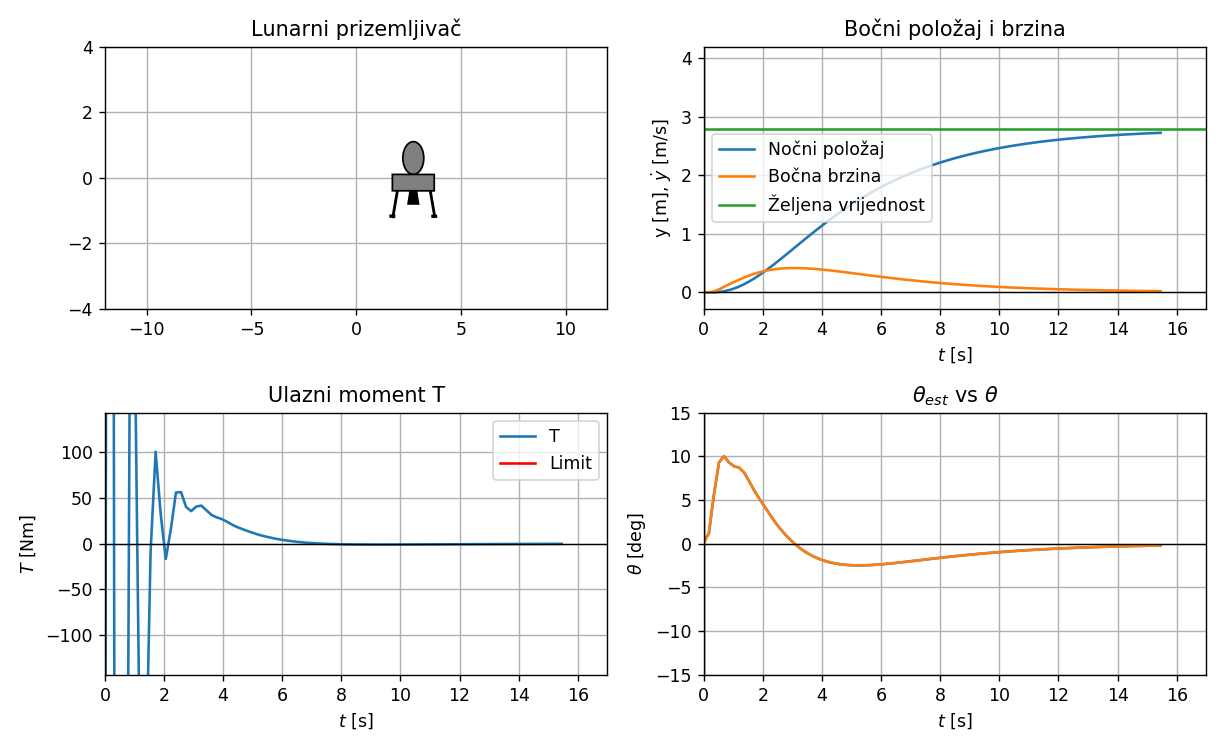

Output()

In [6]:
# Main cell
# Data
global yd, T, yout
yd = 10.
T = []
yout = []

# Figures
fig = plt.figure(num='Simulacija sustava za upravljanje bočnog položaja lunarnog prizemljivača')
fig.set_size_inches((9.8, 6))
fig.set_tight_layout(True)

ax0 = fig.add_subplot(221)
ax0.set_title('Lunarni prizemljivač')
ax0.set_xlim(-12,12)
ax0.set_ylim(-4,4)
ax0.grid()
# ax0.axis('off')

ax1 = fig.add_subplot(222)
linez = ax1.plot([],[])[0]
linezv = ax1.plot([],[])[0]
lined = ax1.plot([],[])[0]
ax1.set_title('Bočni položaj i brzina')
ax1.set_xlabel('$t$ [s]')
ax1.set_ylabel('y [m], $\dot y$ [m/s]')
ax1.set_xlim([0,17])
ax1.axvline(x=0,color='black',linewidth=0.8)
ax1.axhline(y=0,color='black',linewidth=0.8)
ax1.grid()
ax1.legend(['Nočni položaj','Bočna brzina','Željena vrijednost'])

ax2 = fig.add_subplot(223)
lineu = ax2.plot([],[])[0]
linelimu1 = ax2.plot([],[],'r')[0]
linelimu2 = ax2.plot([],[],'r')[0]
ax2.set_title('Ulazni moment T')
ax2.set_xlabel('$t$ [s]')
ax2.set_ylabel('$T$ [Nm]')
ax2.set_xlim([0,17])
ax2.axvline(x=0,color='black',linewidth=0.8)
ax2.axhline(y=0,color='black',linewidth=0.8)
ax2.grid()
ax2.legend(['T','Limit'])

ax3 = fig.add_subplot(224)
linethetaest = ax3.plot([],[])[0]
linetheta = ax3.plot([],[])[0]
ax3.set_title(r'$\theta_{est}$ vs $\theta$')
ax3.set_xlabel('$t$ [s]')
ax3.set_ylabel(r'$\theta$ [deg]')
ax3.axvline(x=0,color='black',linewidth=0.8)
ax3.axhline(y=0,color='black',linewidth=0.8)
ax3.set_xlim([0,17])
ax3.grid()

# Patches
rotation_transform = transforms.Affine2D()
circle = patches.Circle((0, 0.6), fill=True, radius=0.5, ec='black', fc='gray', lw=1, zorder=20, 
                        transform=rotation_transform + ax0.transData)
rect = patches.Rectangle((-1, -0.4), 2, 0.5, fill=True, ec='black', fc='gray', lw=1, zorder=20, 
                         transform=rotation_transform + ax0.transData)
poly = patches.Polygon(numpy.stack(([-0.25, -0.15, 0.15, 0.25], [-0.8, -0.4, -0.4, -0.8])).T, 
                       closed=True, fill=True, ec='black', fc='black', lw=1, zorder=20, 
                       transform=rotation_transform + ax0.transData)
lleg = patches.Rectangle((-1, -1.2), 0.05, 1, angle=-15, fill=True, ec='black', fc='black', lw=1, zorder=10, 
                         transform=rotation_transform + ax0.transData)
rleg = patches.Rectangle((1, -1.2), 0.05, 1, angle=15, fill=True, ec='black', fc='black', lw=1, zorder=10, 
                         transform=rotation_transform + ax0.transData)
lfoot = patches.Rectangle((-1.1, -1.2), 0.2, 0.05, fill=True, ec='black', fc='black', lw=1, zorder=20, 
                         transform=rotation_transform + ax0.transData)
rfoot = patches.Rectangle((0.9, -1.2), 0.2, 0.05, fill=True, ec='black', fc='black', lw=1, zorder=20, 
                         transform=rotation_transform + ax0.transData)
ax0.add_patch(circle)
ax0.add_patch(rect)
ax0.add_patch(poly)
ax0.add_patch(lleg)
ax0.add_patch(rleg)
ax0.add_patch(lfoot)
ax0.add_patch(rfoot)
plt.show()

# Functions
def main_function(Ka,La,Ydw,eig1,eig2,eig3,eig4,eig5,eig1o,eig2o,selm,selc,selo,DW):
    global T, yout, yd, Aa, Ba, A11, A21
    method = method_choice(selm)
    eigc, eigo = eigen_choice(selc,selo)
    yd = Ydw
    ax1.set_ylim([-0.1*yd,yd*1.5])
    ax2.set_ylim([-51*yd,51*yd])
    ax3.set_ylim([-15,15])
    
    if method == 1: #Setted matrix gain
        sol = numpy.linalg.eig((Aa-Ba[:,0]*Ka))
        print('Svojstvene vrijednosti od Aa su: '+str(round(sol[0][0],3))+', '+str(round(sol[0][1],3))+', '+str(round(sol[0][2],3))+', '+str(round(sol[0][3],3))+' i '+str(round(sol[0][4],3)))
        sol = numpy.linalg.eig(A11+La*A21)
        print('Svojstvene vrijednosti od A11+La*A21 su: '+str(round(sol[0][0],3))+' i '+str(round(sol[0][1],3))) 
        sys = simulation(Aa, Ba, Ca, A11, A12, A21, A22, B1, B2, La, Ka, Ta)
        T = numpy.linspace(0, 17, 100)
        T, yout = ctrl.step_response(sys, T, X0a)
    if method == 2: #Setted eigenvalues
        if eigc == 0:
            Ka = ctrl.acker(Aa, Ba[:,0], [eig1[0,0], eig2[0,0], eig3[0,0], eig4[0,0], eig5[0,0]])
            Kaw.setM(Ka)
        if eigc == 2:
            Ka = ctrl.acker(Aa, Ba[:,0], [eig1[0,0], numpy.complex(eig2[0,0],eig2[1,0]), numpy.complex(eig2[0,0],-eig2[1,0]), eig4[0,0], eig5[0,0]])
            Kaw.setM(Ka)
        if eigc == 4:
            Ka = ctrl.acker(Aa, Ba[:,0], [eig1[0,0], numpy.complex(eig2[0,0],eig2[1,0]), numpy.complex(eig2[0,0],-eig2[1,0]), numpy.complex(eig3[0,0],eig3[1,0]), numpy.complex(eig3[0,0],-eig3[1,0])])
            Kaw.setM(Ka)
        if eigo == 0:
            La = numpy.matrix([[0, 2*eig1o[0,0]/3 + 2*eig2o[0,0]/3, 0], [0, -2*eig1o[0,0]*eig2o[0,0]/3, 0]])
            Law.setM(La) 
        if eigo == 2:
            La = numpy.matrix([[0, 2*numpy.complex(eig2o[0,0],eig2o[1,0])/3 + 2*numpy.complex(eig2o[0,0],-eig2o[1,0])/3, 0], [0, -2*numpy.complex(eig2o[0,0],eig2o[1,0])*numpy.complex(eig2o[0,0],-eig2o[1,0])/3, 0]])
            Law.setM(La)
        sol = numpy.linalg.eig((Aa-Ba[:,0]*Ka))
        print('Svojstvene vrijednosti od Aa su: '+str(round(sol[0][0],3))+', '+str(round(sol[0][1],3))+', '+str(round(sol[0][2],3))+', '+str(round(sol[0][3],3))+' i '+str(round(sol[0][4],3)))
        sol = numpy.linalg.eig(A11+La*A21)
        print('Svojstvene vrijednosti od A11+La*A21 su: '+str(round(sol[0][0],3))+' i '+str(round(sol[0][1],3))) 
        sys = simulation(Aa, Ba, Ca, A11, A12, A21, A22, B1, B2, La, Ka, Ta)
        T = numpy.linspace(0, 17, 100)
        T, yout = ctrl.step_response(sys, T, X0a)

ani = animation.FuncAnimation(fig, fun_animation, init_func=anim_init, frames=100, repeat=True, interval=170, blit=True)


#create dummy widget 
DW = widgets.FloatText(layout=widgets.Layout(width='0px', height='0px'))

#create button widget
START = widgets.Button(
    description='Test',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Test',
    icon='check'
)
                       
def on_start_button_clicked(b):
    #This is a workaround to have intreactive_output call the callback:
    #   force the value of the dummy widget to change
    if DW.value> 0 :
        DW.value = -1
    else: 
        DW.value = 1
    pass
START.on_click(on_start_button_clicked)

# Define type of method 
selm = widgets.Dropdown(
    options= ['Postavi Ka i La', 'Postavi svojstvene vrijednosti'],
    value= 'Postavi Ka i La',
    description='',
    disabled=False
)

# Define the number of complex eigenvalues for the controller
selc = widgets.Dropdown(
    options= ['0 kompleksnih svojstvenih vrijednosti', '2 kompleksne svojstvene vrijednosti', '4 kompleksne svojstvene vrijednosti'],
    value= '4 kompleksne svojstvene vrijednosti',
    description='Aa:',
    disabled=False
)

# Define the number of complex eigenvalues for the observer
selo = widgets.Dropdown(
    options= ['0 kompleksnih svojstvenih vrijednosti', '2 kompleksne svojstvene vrijednosti'],
    value= '0 kompleksnih svojstvenih vrijednosti',
    description='Aobs:',
    disabled=False
)

alltogether = widgets.VBox([
    widgets.HBox([
        selm,
        selc,
        selo
    ]),
    widgets.Label('',border=3),
    widgets.HBox([
        widgets.Label('Ka:',border=3),
        Kaw,
        widgets.Label('',border=3),
        widgets.Label('',border=3),
        widgets.Label('La:',border=3),
        Law
    ]),
    widgets.Label('',border=3),
    widgets.HBox([
        widgets.Label('Svojstvene vrijednosti od Aa:',border=3),
        eig1, eig2, eig3, eig4, eig5,
        widgets.Label('',border=3),
        widgets.Label('',border=3),
        widgets.Label('Svojstvene vrijednosti od Aobs:',border=3),
        eig1o, eig2o
    ]),
    widgets.Label('',border=3),
    widgets.HBox([
        Ydw,
        widgets.Label('',border=3),
        widgets.Label('',border=3),
        widgets.Label('',border=3),
        START
    ])
])

out = widgets.interactive_output(main_function,{'Ka':Kaw, 'La':Law, 'Ydw':Ydw, 'eig1':eig1, 'eig2':eig2, 
                                                'eig3':eig3, 'eig4':eig4, 'eig5':eig5,
                                                'eig1o':eig1o, 'eig2o':eig2o,
                                                'selm':selm, 'selc':selc, 'selo':selo, 'DW':DW})
display(out, alltogether)